In [62]:
import pandas as pd
import numpy as np

## a)
Import the StudentsPerformance.csv data using pandas
df_original = pd.read_csv("StudentsPerformance.csv")
Make a copy of df_original, called df_preprep, such that we don’t get warnings every time we make
changes to the dataframe. We are only going to use the columns gender, parental level of education,
test preparation course, math score, reading score and writing score, so feel free to only bring
this over to your df_preprep copy dataframe.

In [63]:
df_original = pd.read_csv("StudentsPerformance.csv")

In [64]:
features_name = ['gender', 'parental level of education', 'test preparation course', 'math score', 'reading score', 'writing score']
df_preprep = df_original[features_name].copy()

## b)
Create a column called sex, which is 0 for male and 1 for female and use
del df_preprep["gender"]
(or drop) to remove the gender column. Also create a column preparation course that is 0 where the test
preparation course column is none and 1 where the test preparation course column is completed.
Finally, remove the test preparation course column.


In [65]:
def get_sex_num(df):
    if df == "female":
        return 1
    else:
        return 0

# Using the .apply function of the dataframe to transform the column to binary numbers
df_preprep["sex"] = df_preprep["gender"].apply(get_sex_num)

# Delete gender as it's no longer needed
del df_preprep["gender"]


In [66]:
def set_prep_course(df):
    if df == "completed":
        return 1
    else:
        return 0
    
df_preprep["preparation course"] = df_preprep["test preparation course"].apply(set_prep_course)
del df_preprep["test preparation course"]

## c)
Use the
from sklearn.preprocessing import OneHotEncoder
and create a one hot encoding of parental level of education (might want to use the parameter
sparse=False when initiating the OneHotEncoder to avoid spare data output). Add each of the one hot
encoding column (should be 6 in total) to the dataframe using self-specified column names. And remove the
parental level of education column.

In [67]:
from sklearn.preprocessing import OneHotEncoder

In [68]:
#parental level of education = plod
plod_encoder = OneHotEncoder(sparse_output=False)



In [69]:
# Fit the OneHotEncoder with the data
plod_encoder.fit(df_preprep[["parental level of education"]])


# Getting the feature names
parental_level_education_names = plod_encoder.get_feature_names_out()

# Setting the feature names to be the transformed values from parental level of education
df_preprep[parental_level_education_names] = plod_encoder.transform(df_preprep[["parental level of education"]])

# dropping parental level of education from the df as it's no longer needed since it's been transformed
del df_preprep["parental level of education"]

## d)
Use one of the
from sklearn.preprocessing import MinMaxScaler, StandardScaler
and scale the reading score and writing score. add the two scaled columns to the dataframe using selfdefined column names, and remove the original reading score and writing score

In [70]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [71]:
scaling_labels = ["reading score", "writing score"]

#1 = MinMax, 2 = Standard
scaler_to_use = 1

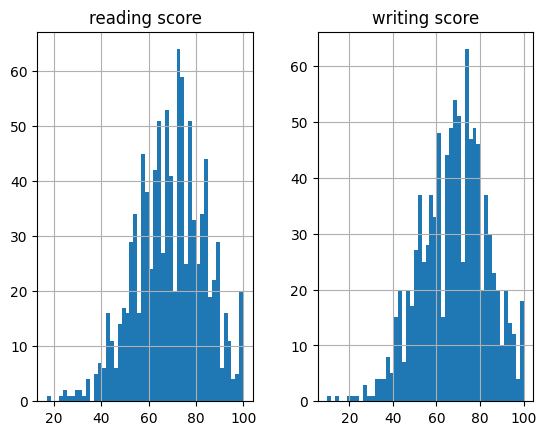

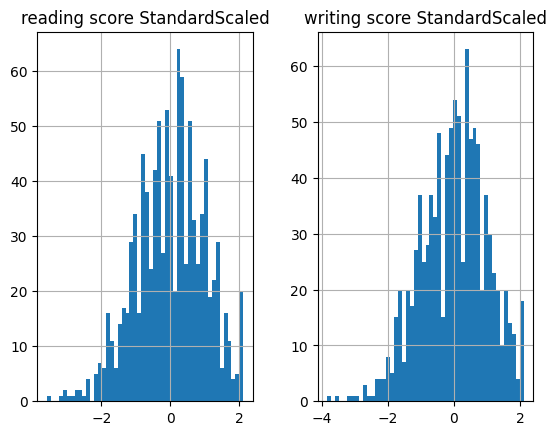

In [72]:
# Prep for scaling using MinMax
scaled_string = ""
if scaler_to_use == 2:
    scaler = MinMaxScaler()
    scaled_string = "MinMaxScaled"
else:
    scaler = StandardScaler()
    scaled_string = "StandardScaled"

scaled_labels = [f"reading score {scaled_string}", f"writing score {scaled_string}"]
df_to_be_scaled = df_preprep[scaling_labels]

df_to_be_scaled.hist(bins=50)
scaler.fit(df_to_be_scaled)

# Perform scale
X_pos = scaler.transform(df_to_be_scaled)

# Put it in a dataframe and display it
df_to_scale_scaled = pd.DataFrame(X_pos, columns=scaled_labels)

df_to_scale_scaled.hist(bins=50)

# Adding df tables to working df
df_preprep[scaled_labels] = df_to_scale_scaled


In [73]:
#Dropping the original labels we scaled on
df_preprep = df_preprep.drop(scaling_labels, axis='columns')

## e)
Extract the math score as label (Y) and use the other columns (sex, preparation course, “6x parent
education one hot encoding”, “reading score scaled”, “writing score scaled”) as features (X). use the np.c_
function to convert them into numpy array. For example by
y = np.c_[df_preprep[["math score"]]]

In [74]:
top = df_preprep.head()

In [75]:
# Get all the long names, as I can't be bothered to write them manually in case of typos
parental_list = []
for title in top:
    if "parental level" in title:
        parental_list.append(title)

In [76]:
features_columns = [['sex'], ['preparation course'], parental_list, scaled_labels]
flat_list = []

for lists in features_columns:
    for element in lists:
        flat_list.append(element)

# print(flat_list)
label = df_preprep['math score']
features = df_preprep[flat_list]

# y is the future with all answers
y = np.c_[label]
X = np.c_[features]

## f)
Split the data into test and train using
at2.md 2023-12-18
6 / 6
from sklearn.model_selection import train_test_split
with a 80/20 percent train/test split.


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
# df_train, df_test = train_test_split(df_preprep, test_size=0.2, random_state=42069)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42069)

## g)
Select the most suitable model (of linear- or logistic-regression) to train a model for predicting math score.
Using one of

In [79]:
from sklearn.linear_model import LinearRegression, LogisticRegression


In [80]:
# Train a logistic regression on the training data.
model = LinearRegression()
model.fit(X_train, y_train.reshape(-1))# Adding this as it was giving a warning if not using ravel, as it was expceting a 1D array

LinearRegression()

## h)
Validate the model performance using suitable metrics based on your model selection. how does this model
compare to a naive model always predicting the average of Y_train?

In [81]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Make the naive model that only the guesses the average
y_test_pred_naive_avg = np.full(y_test.shape, np.average(y_train))
y_test_pred_naive_median = np.full(y_test.shape, np.median(y_train))

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [83]:
# Compare with tests
def perform_tests(train_data, pred_data, test_type_string):
    
    print(test_type_string)
    mae = mean_absolute_error(train_data, pred_data)
    mse = mean_squared_error(train_data, pred_data)
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print("#"*15)

print("Linear Regression")
perform_tests(y_train, y_train_pred, "Trained ")
perform_tests(y_test, y_test_pred, "Test ")
perform_tests(y_test, y_test_pred_naive_avg, "Naive Average")
perform_tests(y_test, y_test_pred_naive_median, "Naive Median")

Linear Regression
Trained 
MAE: 4.74208984375
MSE: 34.34128265380859
###############
Test 
MAE: 4.29953125
MSE: 30.52959228515625
###############
Naive Average
MAE: 13.062125000000002
MSE: 269.02153125
###############
Naive Median
MAE: 13.07
MSE: 269.37
###############


LinearRegression works best here, since we are not classifying if something is something or not, but rather a score instead

## Logistic results
+ Trained 
    + MAE: 6.44375
    + MSE: 72.43875

+ Test 
    + MAE: 7.185
    + MSE: 82.065

+ Naive Average
    + MAE: 13.062125000000002
    + MSE: 269.02153125

+ Naive Median
    + MAE: 13.07
    + MSE: 269.37


## i)
+ _For this part of the question, NO CODING is needed! If you where to use a decision tree to predict if a student had, or had not, taken the test reparation course (as label, y) based on the other columns in the table (including the math, reading and writing scores as feature X). Would you have used DecisionTreeRegressor or DecisionTreeClassifier for this?_

+ I would have used a DecicionTreeClassifier since we are only classifying if something is or isn't something. The only classification we're interested in is wether the test was taken or not


+ _Give numerical examples of suitable metricses used to quantify how well the models where doing (for test and training data) for an:_ 
    
    + Underfitted model 
        + Suitable Metrice: If performance test is taken based only only one the reading,writing and math scores.
        + In this case there would be little data corresponding to give a broader picture, as it is the combination of the 3 that would give the best prediction, having only 1 would create more of an underfitted model. In this type of model the naive model might outperform other models.
        + This would create a high bias model
    + Overfitted model
        + Suitable Metrice: If performance test is taken based on all the  reading,writing and math scores including the parental status as well.
        + This would be if the test was taken under non circumstances. If the test was taken where parent's didn't have any of the education types for example, since there is more data on what parent's don't have than what they have

+ _If you only could change the trees max_depth, would you for each of these models increase or decrease it based on your numerical values, and why. Based on your numerical example values, which model would you pick as the best model for production and why?_
    + For the overfitted I would reduce the max_depth to reduce complexity. Since it would be very focused on all the 0 values from the parents table
    + For the underfitted I'd increase it to increase complexity since it would need to compare others to itself as the result of others may be more relevant to itself




In [84]:

df_preprep.head()

,math score,sex,preparation course,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,reading score StandardScaled,writing score StandardScaled
0,72,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.193999,0.391492
1,69,1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.427476,1.313269
2,90,1,0,0.0,0.0,0.0,1.0,0.0,0.0,1.770109,1.642475
3,47,0,0,1.0,0.0,0.0,0.0,0.0,0.0,-0.833899,-1.583744
4,76,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.605158,0.457333
